In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
df = pd.read_pickle(r'experiment.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.



In [2]:
df.reset_index(inplace = True)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,index,indexers,delegator_portfolios,block_number,simulation,subset,run,substep,timestep
0,4,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,0,0,1,4,1
1,8,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,0,0,1,4,2
2,12,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474307,0,0,1,4,3
3,16,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,11474332,0,0,1,4,4
4,20,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,11474426,0,0,1,4,5


In [8]:
df.tail()

,index,indexers,delegator_portfolios,block_number,simulation,subset,run,substep,timestep
1524,6100,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,13191283,0,0,1,4,1525
1525,6104,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,13198650,0,0,1,4,1526
1526,6108,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,13202983,0,0,1,4,1527
1527,6112,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,13204873,0,0,1,4,1528
1528,6116,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,13207528,0,0,1,4,1529


In [4]:
from model.parts.portfolio import Portfolio
portfolios = df['delegator_portfolios']
portfolio_values = {}
timestep = 0
for i in portfolios:
    for delegator_id, values in i.items():
        if delegator_id not in portfolio_values:
            portfolio_values[delegator_id] = {}
        portfolio_values[delegator_id][timestep] = values
    timestep += 1
delegator_values_df = pd.DataFrame(portfolio_values)
for i in delegator_values_df.columns:
    delegator_values_df[i] = [Portfolio(i) if j != j else j for j in delegator_values_df[i]]
delegator_values_df.head()

,0xd776a7306ee6a060cebb46b46d305e88fd39ba84
3,<model.parts.portfolio.Portfolio object at 0x0...
4,<model.parts.portfolio.Portfolio object at 0x0...
5,<model.parts.portfolio.Portfolio object at 0x0...
6,<model.parts.portfolio.Portfolio object at 0x0...
7,<model.parts.portfolio.Portfolio object at 0x0...


In [5]:
delegator_values_df['0xd776a7306ee6a060cebb46b46d305e88fd39ba84'].items()

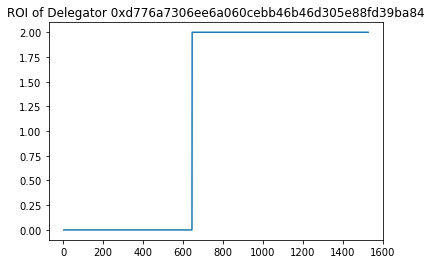

In [6]:
import matplotlib.pyplot as plt
ROI_list = []
for i, values in delegator_values_df['0xd776a7306ee6a060cebb46b46d305e88fd39ba84'].items():
    ROI_list.append(values.ROI)
plt.plot(delegator_values_df.index, ROI_list)
plt.title('ROI of Delegator 0xd776a7306ee6a060cebb46b46d305e88fd39ba84');

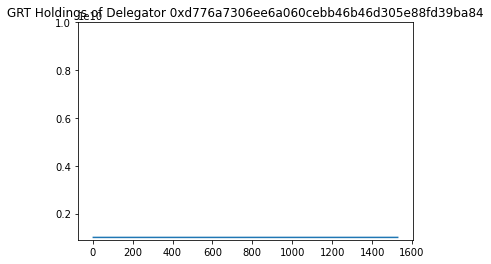

In [7]:
holdings_list = []
for i, values in delegator_values_df['0xd776a7306ee6a060cebb46b46d305e88fd39ba84'].items():
    holdings_list.append(values.holdings)
plt.plot(delegator_values_df.index, holdings_list)
plt.title('GRT Holdings of Delegator 0xd776a7306ee6a060cebb46b46d305e88fd39ba84')
plt.ylim(900000000, 10000000000);

As we set holdings at a high amount to avoid negative values, we can't really see the 160% ROI the delegator made, will be able to see this is we are able to get the actual holdings of delegators. 